# Mission 3

- 아래의 데이터는 회원제로 운영되고 있는 **친환경 식품을 판매하는 소매점**에서 나온 판매 데이터 / 고객 데이터 입니다. 매장에서 제품을 결제하려면 코스트코와 같이, 회원등록을 해야만 결제가 가능합니다. 회원 등록할 때, 회원의 연령, 성별과 같은 기본정보를 수집한 **고객 데이터**가 있습니다. 그리고 각 회원이 매장에서 결제를 진행할 때, 한 제품을 바코드에 찍을 때 마다 발생하는 **결제 데이터**가 존재합니다. 이 두가지 데이터를 이용해서, 아래의 미션을 수행해 봅시다. 

- 먼저 개인 스스로 풀어보고, 풀지 못한 미션은 팀원들과 같이 풀어보세요.
- Chat GPT + 교재 + 팀스터디 모두 활용하여 풀어보시길 바랍니다. 
- 미션 미제출시, 수료증 발급에 제한이 될 수 있습니다. 

- **기한 : 24년 12월 3일 23시 59분까지 / 이후 제출 절대 인정 불가**  
- 제출처: weit2024.project@gmail.com

- 참고 영상 : 
    - 시각화 관련 : https://youtube.com/playlist?list=PLhdHuKlSngGw314hPvsbqV38YY1rqpCkW
    - 데이터 전처리 관련 : https://youtube.com/playlist?list=PLhdHuKlSngGxL_R2g8OYFtsUKs-mMhRBs

1. 1_store_member.csv 데이터를 df_member 변수로, 2_store_product.csv 데이터를 df_product변수로 선언하고, 각각의 데이터의 구조와 타입을 확인하시오  

In [6]:
import pandas as pd
df_member = pd.read_csv('1_store_member.csv')
df_product = pd.read_csv('2_store_product.csv')

print(df_member.info())
print(df_product.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회원번호    4396 non-null   int64 
 1   회원상태    4396 non-null   object
 2   성별      4396 non-null   object
 3   결혼유무    3449 non-null   object
 4   주소      4396 non-null   object
 5   생년      4396 non-null   int64 
 6   연령      4396 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 240.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8

2.  df_product 데이터에서, '회원번호' 별 '구매금액'과 '구매수량'의 합을 계산하고 pandas 라이브러리의 reset_index()함수를 활용해,아래와 같은 테이블로 변환하여, df_product_id 변수로 선언하시오. 

In [8]:
df_product_id = df_product.groupby('회원번호')[['구매금액', '구매수량']].sum()\
                          .reset_index()
print(df_product_id)

        회원번호     구매금액    구매수량
0     2101.0  1991230   382.0
1     2102.0  2095860   472.5
2     2103.0  8273550  1675.4
3     2104.0  6289495  1401.8
4     2105.0  3067930   602.0
...      ...      ...     ...
4280  6492.0    51550    10.0
4281  6493.0    22500     3.0
4282  6494.0    18500     3.0
4283  6495.0     5300     1.0
4284  6496.0    69220     8.0

[4285 rows x 3 columns]


3. pandas 라이브러리의 rename() 함수를 활용하여, df_product_id 변수의 '구매금액'과 '구매수량'항목 명을, '총구매금액', '총구매수량'으로 변환하시오. 

In [10]:
df_product_id = df_product_id.rename(columns={'구매금액': '총구매금액',
                                              '구매수량': '총구매수량'})
print(df_product_id)

        회원번호    총구매금액   총구매수량
0     2101.0  1991230   382.0
1     2102.0  2095860   472.5
2     2103.0  8273550  1675.4
3     2104.0  6289495  1401.8
4     2105.0  3067930   602.0
...      ...      ...     ...
4280  6492.0    51550    10.0
4281  6493.0    22500     3.0
4282  6494.0    18500     3.0
4283  6495.0     5300     1.0
4284  6496.0    69220     8.0

[4285 rows x 3 columns]


4. df_product 데이터에서, '회원번호' 항목과, '공급일자' 데이터를 활용해, 아래와 같이 각 '회원번호'별 '방문횟수'의 합을 계산하여, df_product_id2 변수로 선언하시오. 

In [12]:
df_product_id2 = df_product.groupby('회원번호')\
                           .agg(총방문횟수=('공급일자', 'nunique'))\
                           .reset_index()
print(df_product_id2)

        회원번호  총방문횟수
0     2101.0     86
1     2102.0     79
2     2103.0    126
3     2104.0    125
4     2105.0     57
...      ...    ...
4280  6492.0      1
4281  6493.0      1
4282  6494.0      1
4283  6495.0      1
4284  6496.0      1

[4285 rows x 2 columns]


5. 앞서 생성한 df_product_id 변수와 df_product_id2 변수, df_member 변수를 이용해, '회원번호'를 기준으로 아래와 같이 하나의 데이터로 병합하고, df2 변수로 선언하시오. (pandas merge함수 활용)

In [14]:
df2 = pd.merge(df_product_id, df_product_id2, on='회원번호')
df2 = pd.merge(df2, df_member, on='회원번호')
print(df2)

        회원번호    총구매금액   총구매수량  총방문횟수  회원상태 성별 결혼유무               주소    생년  연령
0     2101.0  1991230   382.0     86  정상회원  여   기혼  서울 강북구 미아동 134-  1967  51
1     2102.0  2095860   472.5     79  정상회원  여  NaN   경기 용인시 수지구 동천동  1947  71
2     2103.0  8273550  1675.4    126  정상회원  여   기혼   경기 용인시 수지구 동천동  1972  46
3     2104.0  6289495  1401.8    125  정상회원  여  NaN   경기 용인시 수지구 성복동  1969  49
4     2105.0  3067930   602.0     57  정상회원  여   기혼   경기 용인시 수지구 동천동  1948  70
...      ...      ...     ...    ...   ... ..  ...              ...   ...  ..
4280  6492.0    51550    10.0      1  정상회원  여   미혼   경기 성남시 분당구 판교동  1963  55
4281  6493.0    22500     3.0      1  정상회원  여   기혼  서울 관악구 행운동 1681  1982  36
4282  6494.0    18500     3.0      1  정상회원  남   기혼   경기 성남시 분당구 백현동  1975  43
4283  6495.0     5300     1.0      1  정상회원  여   기혼  서울 용산구 한남동 737-  1961  57
4284  6496.0    69220     8.0      1  정상회원  여   미혼   경기 수원시 영통구 이의동  1971  47

[4285 rows x 10 columns]


6. df2 데이터에서 '총구매금액'과 '총방문횟수'를 나누어, 고객이 한번 방문했을 때, 평균적으로 구매하는 금액 '1회방문구매평균' 항목을 계산하고, 변수로 선언하시오.  

In [16]:
df2['1회방문구매평균'] = df2['총구매금액'] / df2['총방문횟수']
print(df2)

        회원번호    총구매금액   총구매수량  총방문횟수  회원상태 성별 결혼유무               주소    생년  연령  \
0     2101.0  1991230   382.0     86  정상회원  여   기혼  서울 강북구 미아동 134-  1967  51   
1     2102.0  2095860   472.5     79  정상회원  여  NaN   경기 용인시 수지구 동천동  1947  71   
2     2103.0  8273550  1675.4    126  정상회원  여   기혼   경기 용인시 수지구 동천동  1972  46   
3     2104.0  6289495  1401.8    125  정상회원  여  NaN   경기 용인시 수지구 성복동  1969  49   
4     2105.0  3067930   602.0     57  정상회원  여   기혼   경기 용인시 수지구 동천동  1948  70   
...      ...      ...     ...    ...   ... ..  ...              ...   ...  ..   
4280  6492.0    51550    10.0      1  정상회원  여   미혼   경기 성남시 분당구 판교동  1963  55   
4281  6493.0    22500     3.0      1  정상회원  여   기혼  서울 관악구 행운동 1681  1982  36   
4282  6494.0    18500     3.0      1  정상회원  남   기혼   경기 성남시 분당구 백현동  1975  43   
4283  6495.0     5300     1.0      1  정상회원  여   기혼  서울 용산구 한남동 737-  1961  57   
4284  6496.0    69220     8.0      1  정상회원  여   미혼   경기 수원시 영통구 이의동  1971  47   

          1회방문구매평균  
0     

7. df2 데이터에서 고객 '연령'데이터를 이용해, 고객의 '연령대'를 계산하고 파생변수로 선언하시오. 

In [18]:
df2['연령대'] = pd.cut(
    df2['연령'],
    bins=[0, 19, 29, 39, 49, 59, 69, 79, 200],
    labels=['10대 이하', '20대', '30대', '40대', 
            '50대', '60대', '70대', '80대 이상'],
    right=True
)
print(df2)

        회원번호    총구매금액   총구매수량  총방문횟수  회원상태 성별 결혼유무               주소    생년  연령  \
0     2101.0  1991230   382.0     86  정상회원  여   기혼  서울 강북구 미아동 134-  1967  51   
1     2102.0  2095860   472.5     79  정상회원  여  NaN   경기 용인시 수지구 동천동  1947  71   
2     2103.0  8273550  1675.4    126  정상회원  여   기혼   경기 용인시 수지구 동천동  1972  46   
3     2104.0  6289495  1401.8    125  정상회원  여  NaN   경기 용인시 수지구 성복동  1969  49   
4     2105.0  3067930   602.0     57  정상회원  여   기혼   경기 용인시 수지구 동천동  1948  70   
...      ...      ...     ...    ...   ... ..  ...              ...   ...  ..   
4280  6492.0    51550    10.0      1  정상회원  여   미혼   경기 성남시 분당구 판교동  1963  55   
4281  6493.0    22500     3.0      1  정상회원  여   기혼  서울 관악구 행운동 1681  1982  36   
4282  6494.0    18500     3.0      1  정상회원  남   기혼   경기 성남시 분당구 백현동  1975  43   
4283  6495.0     5300     1.0      1  정상회원  여   기혼  서울 용산구 한남동 737-  1961  57   
4284  6496.0    69220     8.0      1  정상회원  여   미혼   경기 수원시 영통구 이의동  1971  47   

          1회방문구매평균  연령대  
0

8. df_product데이터의'물품대분류' 중 가장 많이 판매되는(수량)3가지 항목을 확인 하시오. 

In [20]:
top_3_products = df_product.groupby('물품대분류')['구매수량']\
                           .sum().reset_index()\
                           .sort_values(by='구매수량', ascending=False)
top_3_products.head(3)

,물품대분류,구매수량
15,채소,210661.70
16,축산물,155188.75
0,간식,137427.30


9. 앞서 확인한 3가지 항목을 추출하여, df_product_top이라는 변수로 선언하고, df_product_top에서 '구매매장'별 '구매금액'의 합과 평균을 계산하시오.

In [22]:
top_3_categories = top_3_products['물품대분류']
df_product_top = df_product[df_product['물품대분류'].isin(top_3_categories)]

df_purchase = df_product_top.groupby('구매매장')['구매금액']\
                                    .agg(['sum', 'mean']).reset_index()
print(df_purchase)

  구매매장         sum         mean
0  매장1   745858255  5698.228744
1  매장2   902358696  5728.970567
2  매장3  1712438120  5535.457690
3  매장4   816392717  5914.860582


10. df_product데이터의 '공급일자'데이터를 날짜형식으로 변환하여, '연도' / '월' / '요일' 항목을 새로운 파생변수로 생성하시오.

In [24]:
df_product['공급일자'] = pd.to_datetime(df_product['공급일자'], 
                                        format='%Y%m%d')

df_product['연도'] = df_product['공급일자'].dt.year
df_product['월'] = df_product['공급일자'].dt.month
df_product['요일'] = df_product['공급일자'].dt.day_name()

print(df_product[['공급일자', '연도', '월', '요일']])

             공급일자    연도  월         요일
0      2017-02-01  2017  2  Wednesday
1      2017-02-01  2017  2  Wednesday
2      2017-02-01  2017  2  Wednesday
3      2017-02-01  2017  2  Wednesday
4      2017-02-01  2017  2  Wednesday
...           ...   ... ..        ...
735778 2017-06-30  2017  6     Friday
735779 2017-06-30  2017  6     Friday
735780 2017-06-30  2017  6     Friday
735781 2017-06-30  2017  6     Friday
735782 2017-06-30  2017  6     Friday

[735783 rows x 4 columns]


11. df_product데이터의 '월'에 따른'물품대분류'별 '구매금액'의 합을 게산하여 result8.xlsx저장 하시오. 

In [26]:
result = df_product.groupby(['월', '물품대분류'])['구매금액']\
                   .sum().reset_index()
result.to_excel('result8.xlsx', index=False)
print("result8.xlsx 저장 완료")

result8.xlsx 저장 완료


12. df2 데이터를 이용해, '성별'에 따른 '총구매금액'의 평균을 시각화 하시오. 

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\L

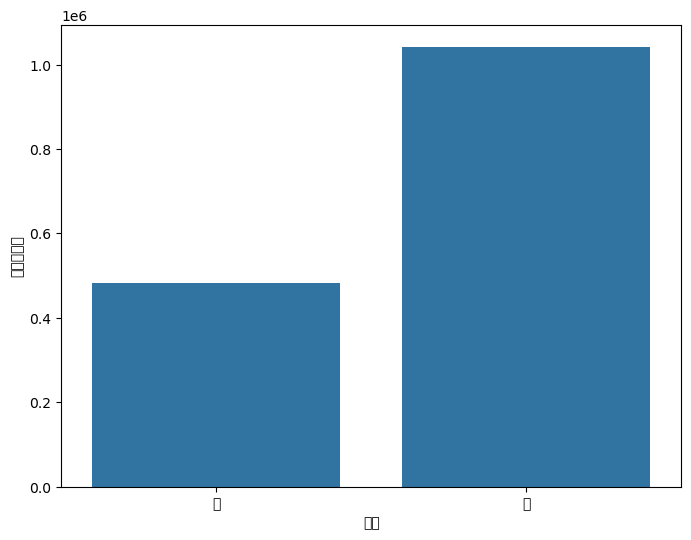

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

gender_avg_purchase = df2.groupby('성별')['총구매금액']\
                         .mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='성별', y='총구매금액', data=gender_avg_purchase)
plt.show()

13. df2 데이터를 이용해, '1회방문구매평균'을 바탕으로 고객등급을 분류하고자 한다. 10만원 이상 고객은 A / 5만원 이상은 B / 2만원 이상 C / 나머지는 D 등급으로 분류하여, '고객등급'이라는 새로운 항목을 생성하시오.  

14. df2에서 '고객등급'을 input 함수를 이용해 특정 값을 입력했을 때, 해당 고객등급에서 '성별'에 따른 '총구매금액' 기술통계량(describe 함수 활용)을 계산하여 'result9_등급명.xlsx'저장하는 프로그램을 구성하시오. 

# -끝- 고생하셨습니다

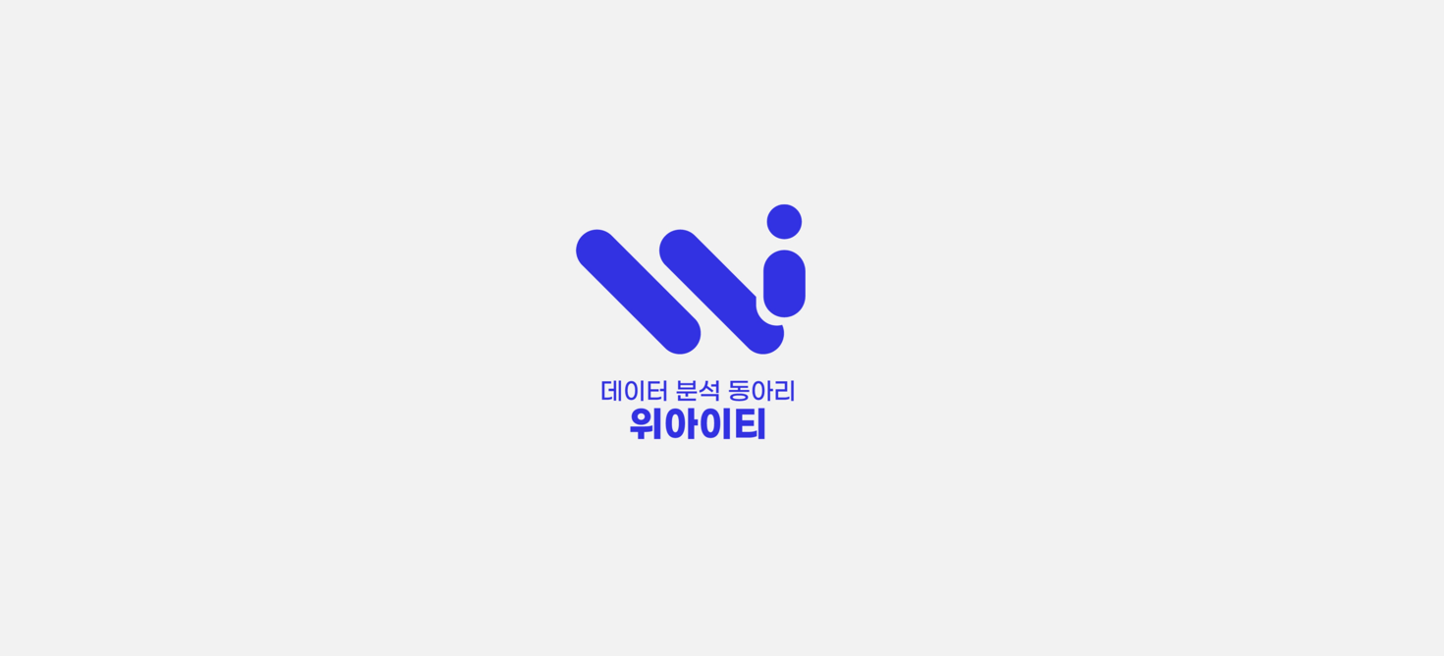